## Introduction to COLAB


We will use Google Colab.
*  You don't need to install anything; you only need a GOOGLE account.
*  Colab allows us to write and execute code directly in the browser.
*  We can think of it as a Jupyter Notebook hosted on Google's servers.
*  It requires relatively little configuration to use.
*  Python is installed in Colab, along with several important packages (software packages).
*  With Colab, we can access the GPU environment (with a maximum usage time of 12 hours for the GPU).

## Runtime
* You can choose between CPU and GPU execution in Google Colab.
* The CPU is suitable for general programming tasks and data analysis.
* The GPU is essential for computationally intensive tasks, such as machine (deep) learning.
* Click on 'Runtime' -> 'Change Runtime Type' -> Select GPU or CPU.

## Example

In [ ]:
x = 10
y = 5

In [ ]:
# We can access the variables in every cell
print(x / y)

2.0


In [ ]:
# Let's import the numpy package
# Reminder: numPy is a library for scientific computing, data analysis, and machine learning in Python.
# It provides the fundamental building blocks for handling and manipulating numerical data.
import numpy as np

In [ ]:
x = np.array([1, 2, 3])  # x has been overwritten. It is no longer equal to 10.
y = np.array([5, 6, 7])  # y has been overwritten. It is no longer equal to 5.

In [ ]:
print(np.dot(x,y)) # Dot product of two one-dimensional arrays x and y
# (1x5)+(2x6)+(3x7) = 38

38


[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]


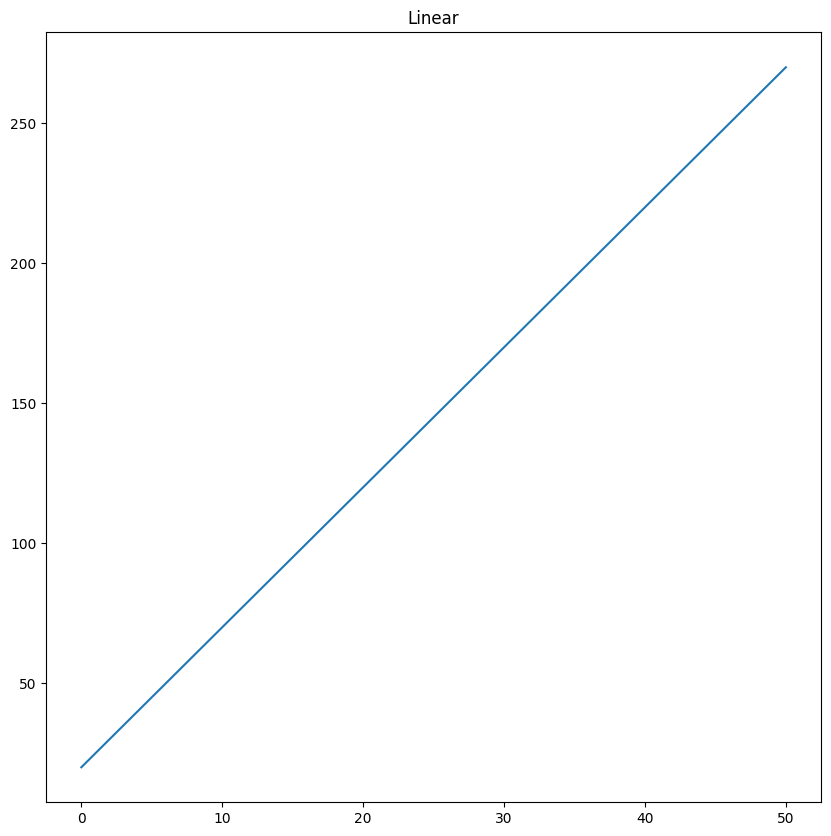

In [ ]:
# Graphical representation of data with Python
# We use matplotlib to draw graphs (let's import the matplotlib package)
# Specifically, import the "pyplot" module from the "matplotlib" library

import matplotlib.pyplot as plt

a = 5
b = 20

x = np.linspace(0, 50) #generates an array of evenly spaced numbers over a specified interval
print(x)
y = a * x + b

f = plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.title("Linear")
plt.show()

## Pytorch
* PyTorch is used to perform various machine learning and deep learning tasks, including model creation, training, validation, and testing.

In [ ]:
import torch #Import the PyTorch library into our Colab environment

In [ ]:
x = torch.tensor([1, 2, 3]) # Creating a tensor
# A tensor is a fundamental data structure in PyTorch.
# A tensor is a mathematical object that generalizes scalars, vectors, and matrices to higher dimensions.
# In the context of PyTorch and machine learning, a tensor is a multi-dimensional array used to store and manipulate data, enabling efficient computation for tasks like deep learning.
# Tensors can have various ranks (or dimensions), such as 0D (scalar), 1D (vector), 2D (matrix), and higher dimensions.

In [ ]:
# When you want to check the type of your device (runtime), write:
print(x.device)

cpu


In [ ]:
# Let's check if the GPU is available
print(torch.cuda.is_available())

True


In [ ]:
# Warning: "x" is currently defined on the CPU
# If we want to use "x" with the GPU
# Allocate "x" on the GPU
x = torch.tensor([1, 2, 3], device="cuda:0")
# Once "x" is on the GPU, any operation you perform on "x" will also be executed on the GPU!

In [ ]:
print(x.device)

cuda:0


In [ ]:
print(torch.cuda.device_count()) # Print the number of CUDA-enabled GPU devices available

1


## Data Preparation in Python
* Storing data
* Data Loading
* Applying preprocessing operations
* Model feeding with input

WARNING: If the data is incorrect, the model will never learn!

HINT: It's always a good idea to check the data right before feeding it into the model.


## Tabular Data

Tabular data is organized in tables with rows and columns. Each row represents a single piece of information (sample, example), and each column represents a specific attribute (feature).

**Pandas** (an open-source library for data analysis and manipulation in Python) is useful for handling tabular data.


In [ ]:
#import the Pandas library
import pandas as pd

In [ ]:
# Clone a Git repository from the specified URL

! git clone https://github.com/datasciencedojo/datasets.git

In [ ]:
# Read a CSV file called "titanic.csv" from the "datasets" folder and load the data into a Pandas DataFrame
# A DataFrame is a two-dimensional, variable-sized, tabular data structure.
data = pd.read_csv("datasets/titanic.csv")

In [ ]:
# To view the first rows (usually 5 rows) of a DataFrame
data.head()
# Each row represents a single example, each column represents a feature, and the label.

In [ ]:
target_name = "Survived"
# "data.iloc" in pandas is a method used to extract specific rows or columns from a DataFrame
X = data.iloc[:, data.columns != target_name]  # The features are stored in the other columns.
Y = data.iloc[:, data.columns == target_name]  # The labels are stored in the "Survived" column.

In [ ]:
# Print the data types (integer, object, float...) of the columns in the DataFrame X
print(X.dtypes)
print("------")
# Print the data types of Y
print(Y.dtypes)


In [ ]:
# "describe" generates summary statistics for the numeric columns in the DataFrame.
# It provides the count of observations (COUNT), mean (MEAN), standard deviation (STD),
# minimum value (min), first quartile (25%), median (50%), third quartile (75%), and
# maximum value (max) for each numeric column
print(X.describe())

### IMPORTANT!!!! Missing Values
Handling missing data typically involves several common techniques:
* We can remove rows or columns with missing values (NaN values).
* We can assign a default value, for example, replacing all missing numeric values with ZERO.
* Imputation: Replace missing values with the mean, median, or mode of the non-missing values for that feature.


In [ ]:
# Count the number of missing values (NaN) in each column of the DataFrame
def count_nans_per_col(df):
    for column in list(df.columns):
        n_nans = pd.isna(df[column]).sum()  # pd.isna is a function to identify missing values (NaN)
        print(f"Number of NaN for attribute: {column}: {n_nans}")

In [ ]:
# Call the function we defined.
count_nans_per_col(X)

In [ ]:
# Drop the samples with at least 1 NaN value.
X_drop = X.dropna()
count_nans_per_col(X_drop)

In [ ]:
X["Age"]  # Select the "Age" column from the DataFrame X
# NOTE: The additional information you see, "Name: Age, Length: 891, dtype: float64," does not represent the return value of the operation,
# but rather the information provided by pandas when displaying a Series.
# Name (name of the Series), Length (the number of elements in the Series), dtype (the data type of the elements in the Series)

In [ ]:
# Use "SimpleImputer" from the "sklearn" module to handle missing values.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # In this case, we use the mean instead of the median as done previously.
X["Age"] = imputer.fit_transform(X[["Age"]])

### Guide to Handling Categorical Features
* One Hot Encoding (Dummy Variables)
* Label Encoding

PS: There are other methods, but these are frequently used.

In [ ]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked"]

In [ ]:
# One Hot Encoding: pd.get_dummies performs one-hot encoding by converting categorical columns into binary columns filled with 1s or 0s.
X = pd.get_dummies(X[features])

In [ ]:
X.head()  # Note that instead of one column for "Sex", we now have two columns: "Sex_female" and "Sex_male."
# "Embarked" initially had three different values, so now we have three binary columns for "Embarked."

### Label Encoding

* It assigns a unique integer to each distinct category.

* Label encoding preserves the ordinal information if there is any implicit order among the categories. For example, if you are encoding sizes (small, medium, large), the encoded values might be 0, 1, and 2, respectively, reflecting the order of sizes.

* Label encoding assumes that there's an intrinsic order to the categories, which may not always be true for all categorical variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Create an example dataset with columns cat, dog, fish, cat, dog
data = ["cat", "elephant", "dog", "fish", "cat", "dog"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the data using label encoding
encoded_data = label_encoder.fit_transform(data)

# Print the original data and the encoded data
print("Original data:", data)
print("Encoded data:", encoded_data)

# Decode the encoded data back to the original labels (Decoding back to original data)
decoded_data = label_encoder.inverse_transform(encoded_data)
print("Decoded data:", decoded_data)
